In [55]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# from collections import Counter
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
from itertools import combinations
from collections import defaultdict, Counter  # 添加了Counter和defaultdict的导入
import pandas as pd  # 添加pandas导入

# 中文显示配置（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中有的中文字体
plt.rcParams['axes.unicode_minus'] = False

def load_and_analyze(json_path):
    """加载数据并进行分析"""
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    df_recipes = pd.DataFrame(data["recipes"])
    df_books = pd.DataFrame(data["books"])
    
    print(f"\n{'='*50}")
    print(f"数据集概览")
    print(f"书籍数量: {len(df_books)}")
    print(f"菜谱数量: {len(df_recipes)}")
    print(f"最早出版年份: {df_books['date'].min()}" if 'date' in df_books.columns else "")
    print(f"民族分类数量: {df_recipes['ethnic_group'].nunique()}")
    print(f"菜系类别数量: {df_recipes['class1'].nunique()}")
    print(f"最常用食材: {Counter([i for lst in df_recipes['ingredients'] for i in lst]).most_common(5)}")
    
    return df_recipes, df_books



In [56]:
df_recipes, df_books = load_and_analyze("cookbooks_collection_new.json")


数据集概览
书籍数量: 74
菜谱数量: 43670

民族分类数量: 122
菜系类别数量: 8
最常用食材: [('salt', 17453), ('butter', 16309), ('sugar', 13638), ('flour', 11396), ('water', 11395)]


In [57]:
# print(df_recipes.head())
df_books.head()

,title,author,book_id,ethnic_group,region
0,"The American Woman's Home: or, Principles of D...","Beecher, Catharine Esther",1869amwh,,general
1,Manual For Army Cooks...,United States War Department.,1896army,,general
2,"""Aunt Babette's"" Cook Book. Foreign and Domest...","""Aunt Babette""",1889aunt,jewish,ethnic
3,,Unknown,1917bart,,general
4,MISS BEECHER'S,Unknown,1850beec,,general


In [58]:
df_recipes.head()

,name,class1,class2,ethnic_group,region,ingredients,implements,book_id,cookbook_title
0,"café noir, or black coffee.",beverages,,,,"[beet-root sugar, boiled milk, boiling water, ...",[coffee-pot],1869amwh,"The American Woman's Home: or, Principles of D..."
1,STOCK,soups,,,,"[Pepper, STOCK, Stock, boiling water, bone, bo...",[],1896army,Manual For Army Cooks...
2,VEGETABLE SOUP (FROM STOCK,soups,,,,"[STOCK, Salt, boiling water, pepper, rice, sal...",[],1896army,Manual For Army Cooks...
3,TOMATO STOCK,soups,,,,"[Pepper, STOCK, TOMATO, salt, stock, tomatoes]",[],1896army,Manual For Army Cooks...
4,BARLEY STOCK,soups,,,,"[BARLEY, STOCK, Salt, barley, boiling water, c...",[],1896army,Manual For Army Cooks...


In [59]:
# 统计 ethnic_group 中空值和空字符串
empty_str_count = (df_recipes['ethnic_group'].astype(str).str.strip() == '').sum()
nan_count = df_recipes['ethnic_group'].isna().sum()

print(f"Empty string count: {empty_str_count}")
print(f"NaN count: {nan_count}")


Empty string count: 37750
NaN count: 0


C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_34044\3573449013.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette='Blues_r')


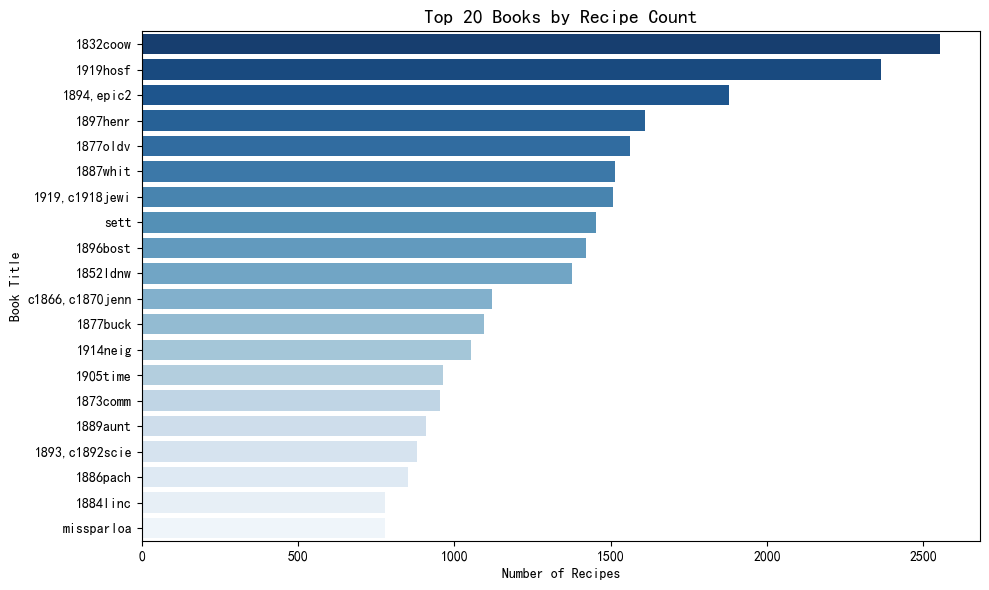

C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_34044\3573449013.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=short_labels, y=book_counts.values, palette='Blues_r')


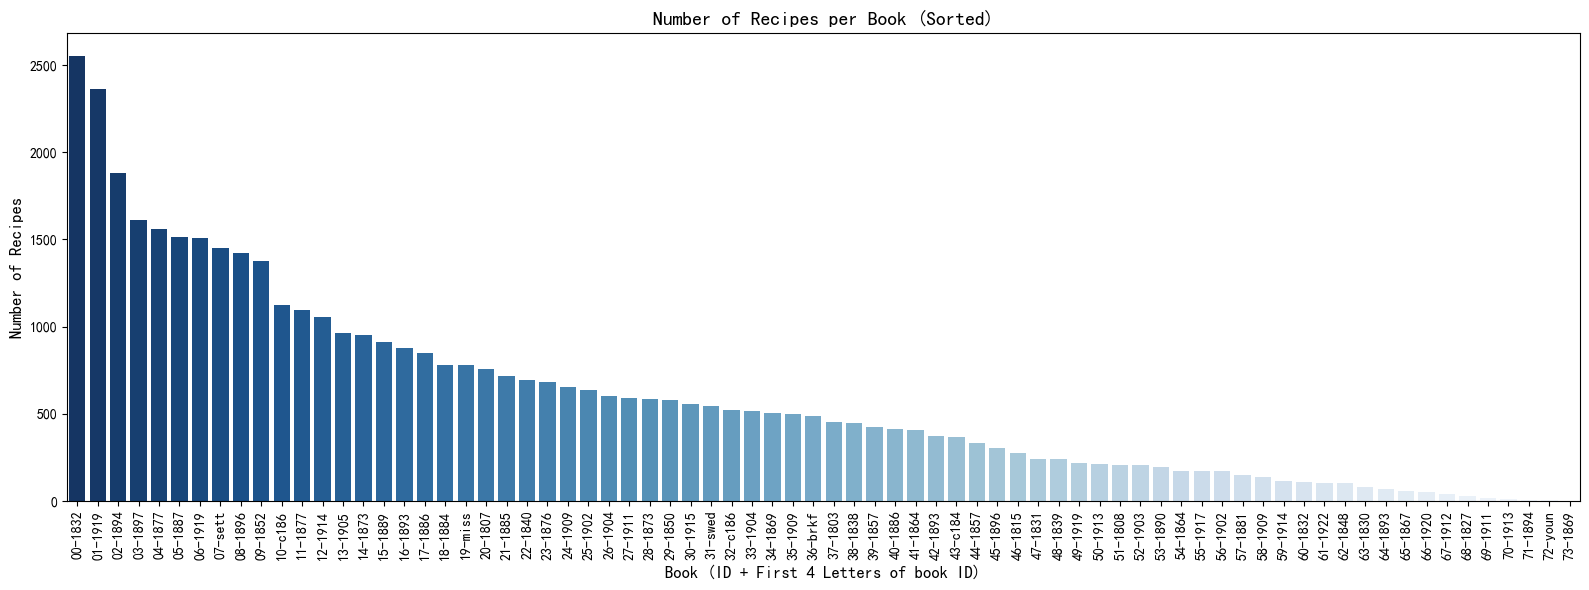


书籍缩略名和原名映射（前10本）：
00-1832 → 1832coow
01-1919 → 1919hosf
02-1894 → 1894,epic2
03-1897 → 1897henr
04-1877 → 1877oldv
05-1887 → 1887whit
06-1919 → 1919,c1918jewi
07-sett → sett
08-1896 → 1896bost
09-1852 → 1852ldnw


In [60]:
# def plot_recipes_per_book(df):
#     recipe_counts = df['source_book'].value_counts()
    
#     plt.figure(figsize=(10, 6))
#     sns.histplot(recipe_counts, bins=20, kde=True)
#     plt.title("Distribution of Recipe Counts per Book", fontsize=14)
#     plt.xlabel("Recipes per Book")
#     plt.ylabel("Number of Books")
#     plt.tight_layout()
#     plt.show()
    
#     print("\n前10本书的菜谱数量：")
#     print(recipe_counts.head(10))
# plot_recipes_per_book(df_recipes)

def plot_top_books(df, top_n=10):
    top_books = df['book_id'].value_counts().head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_books.values, y=top_books.index, palette='Blues_r')
    plt.title(f"Top {top_n} Books by Recipe Count", fontsize=14)
    plt.xlabel("Number of Recipes")
    plt.ylabel("Book Title")
    plt.tight_layout()
    plt.show()
plot_top_books(df_recipes, top_n=20)

def plot_all_books_sorted_unique(df):
    book_counts = df['book_id'].value_counts()
    
    # 简化 + 唯一标签，避免重复导致绘图问题
    short_labels = [f"{i:02d}-{book[:4]}" for i, book in enumerate(book_counts.index)]

    plt.figure(figsize=(16, 6))
    sns.barplot(x=short_labels, y=book_counts.values, palette='Blues_r')

    plt.title("Number of Recipes per Book (Sorted)", fontsize=14)
    plt.xlabel("Book (ID + First 4 Letters of book ID)", fontsize=12)
    plt.ylabel("Number of Recipes", fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # 显示前10的映射关系方便理解
    print("\n书籍缩略名和原名映射（前10本）：")
    for short, full in zip(short_labels[:10], book_counts.index[:10]):
        print(f"{short} → {full}")


plot_all_books_sorted_unique(df_recipes)


In [61]:
# 检查所有书籍标题
all_books = set(df_books['book_id'])

# 检查有菜谱的书籍标题
books_with_recipes = set(df_recipes['book_id'])

# 找出不匹配的书籍
books_in_all_not_in_recipes = all_books - books_with_recipes
books_in_recipes_not_in_all = books_with_recipes - all_books

# 打印结果
print(f"Books in all_books but not in books_with_recipes:\n")
for book in books_in_all_not_in_recipes:
    print(book)

print(f"\nBooks in books_with_recipes but not in all_books:\n")
for book in books_in_recipes_not_in_all:
    print(book)

Books in all_books but not in books_with_recipes:


Books in books_with_recipes but not in all_books:



C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_34044\4135259328.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


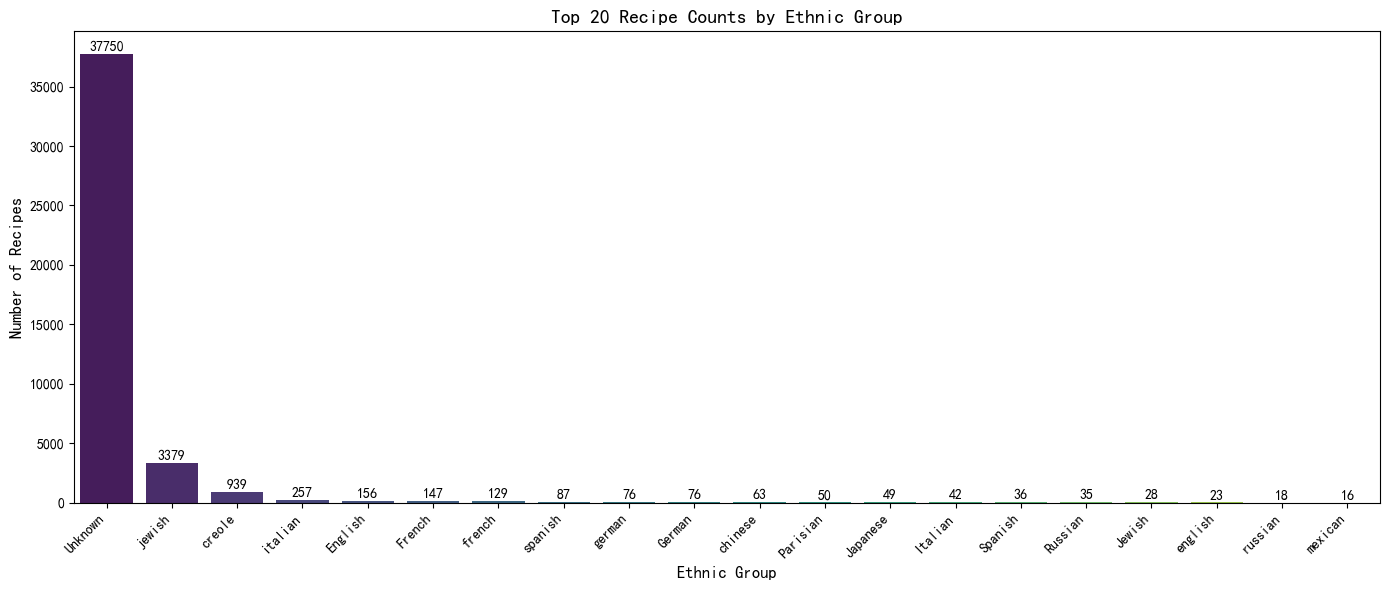

In [ ]:
# 可视化1：民族分布
def plot_ethnic_distribution(df):
    """Visualize recipe distribution by ethnic group (Top 20)"""

    # # 处理空字符串和 NaN
    # df.loc[df['ethnic_group'].astype(str).str.strip() == '', 'ethnic_group'] = None
    # df['ethnic_group'] = df['ethnic_group'].fillna('Unknown')

    # 获取前 20 个民族分类
    ethnic_counts = df['ethnic_group'].value_counts().head(20)

    # 创建图像
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        x=ethnic_counts.index, 
        y=ethnic_counts.values,
        palette="viridis"
    )

    # 图标题和坐标轴（英文）
    plt.title("Top 20 Recipe Counts by Ethnic Group", fontsize=14)
    plt.xlabel("Ethnic Group", fontsize=12)
    plt.ylabel("Number of Recipes", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # 添加数值标签
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center", va="center", 
            xytext=(0, 5), 
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()
plot_ethnic_distribution(df_recipes)

每个类别的数量:
class1
breadsweets        14022
meatfishgame        9646
fruitvegbeans       6427
accompaniments      4843
eggscheesedairy     3960
soups               2248
beverages           1995
medhealth            529
Name: count, dtype: int64
菜谱总数: 43670


C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_34044\1345841915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_34044\1345841915.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)  # 将y轴标签字体放大到14


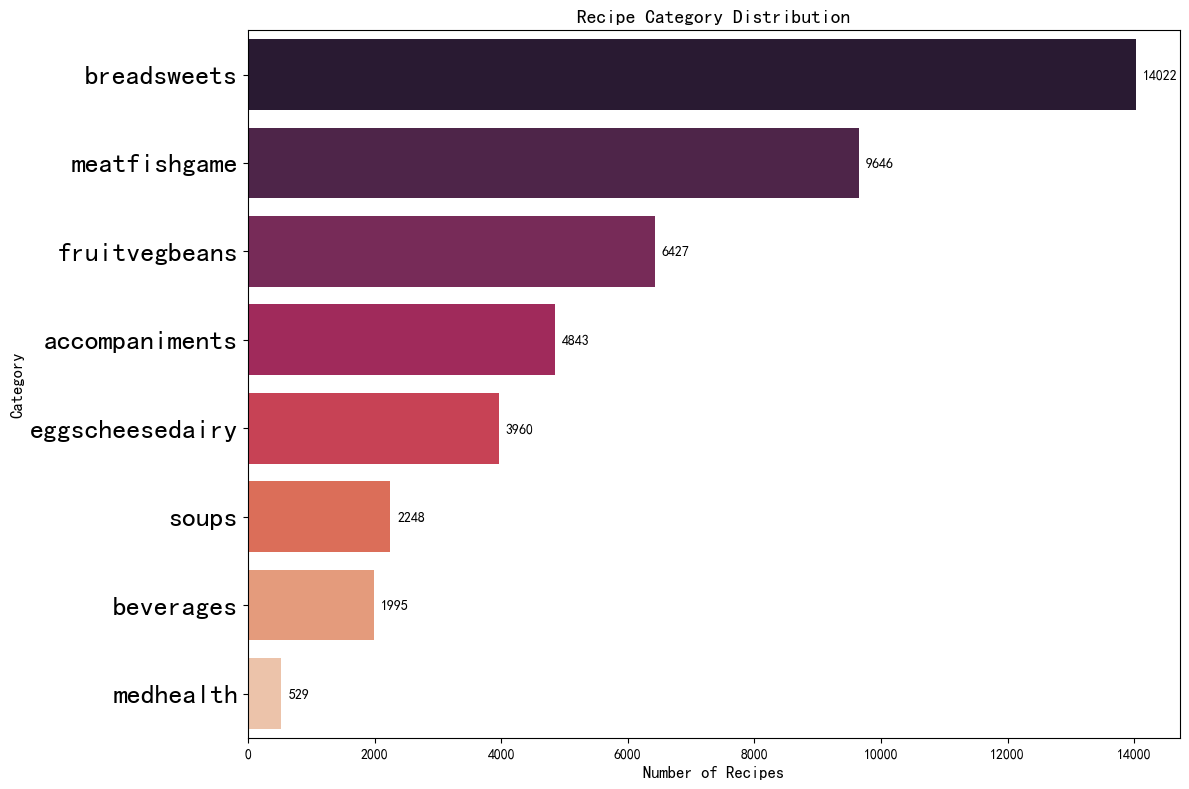

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df):
    """Visualize the distribution of recipe categories"""
    plt.figure(figsize=(12, 8))
    class_counts = df['class1'].value_counts()

    # 打印每个类别的数量
    print(f"每个类别的数量:\n{class_counts}")
    print(f"菜谱总数: {df.shape[0]}")  # 打印菜谱总数

    ax = sns.barplot(
        y=class_counts.index,
        x=class_counts.values,
        palette="rocket",
        orient="h"
    )

    plt.title("Recipe Category Distribution", fontsize=14)
    plt.xlabel("Number of Recipes", fontsize=12)
    plt.ylabel("Category", fontsize=12)

    # 设置y轴标签字体大小
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)  # 将y轴标签字体放大到14

    for p in ax.patches:
        width = p.get_width()
        ax.annotate(
            f"{width:.0f}",
            (width, p.get_y() + p.get_height() / 2.),
            ha="left", va="center",
            xytext=(5, 0),
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()


plot_class_distribution(df_recipes)

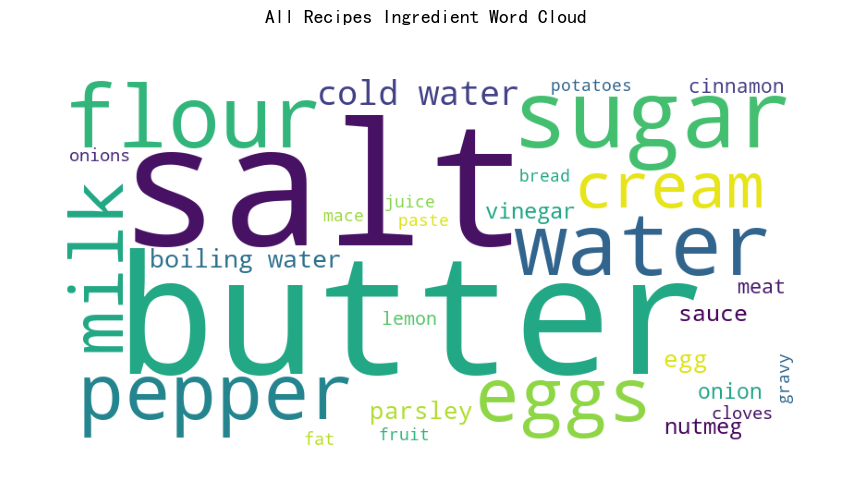


Top 30 Ingredients in All Recipes:
salt: 17453 times
butter: 16309 times
sugar: 13638 times
flour: 11396 times
water: 11395 times
pepper: 8664 times
eggs: 8072 times
milk: 7797 times
cream: 5570 times
cold water: 4496 times
boiling water: 3909 times
parsley: 3756 times
egg: 3679 times
sauce: 3435 times
nutmeg: 3105 times
vinegar: 3082 times
onion: 2947 times
meat: 2667 times
cinnamon: 2467 times
lemon: 2301 times
cloves: 2184 times
onions: 2155 times
fat: 2146 times
gravy: 1972 times
fruit: 1908 times
mace: 1903 times
juice: 1880 times
paste: 1829 times
bread: 1822 times
potatoes: 1795 times

Average number of ingredients per recipe: 8.65


In [64]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def generate_full_recipe_wordcloud(df, max_words=30, padding_px=50):
    """Generate a word cloud for all recipes without ethnic classification"""
    # 收集所有菜谱的食材
    all_ingredients = [
        ing
        for lst in df['ingredients']
        for ing in lst
    ]
    
    # 计算食材的频率
    freq = Counter(all_ingredients)
    filtered_freq = dict(freq.most_common(max_words))
    
    # 创建词云
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis",
        max_words=max_words
    ).generate_from_frequencies(filtered_freq)

    # 将词云转为PIL图像并添加边框
    wc_image = wc.to_image()
    padded_img = ImageOps.expand(wc_image, border=padding_px, fill='white')

    # 展示图像
    plt.figure(figsize=(12, 6))
    plt.imshow(padded_img)
    plt.title("All Recipes Ingredient Word Cloud", fontsize=14)
    plt.axis("off")
    plt.show()

    # 打印频率
    print(f"\nTop {max_words} Ingredients in All Recipes:")
    for item, count in filtered_freq.items():
        print(f"{item}: {count} times")
    
    # 计算并打印平均食材数量
    total_ingredients = sum(len(ingredients) for ingredients in df['ingredients'])
    average_ingredients = total_ingredients / len(df)
    print(f"\nAverage number of ingredients per recipe: {average_ingredients:.2f}")

# 生成全菜谱的词云
generate_full_recipe_wordcloud(df_recipes)


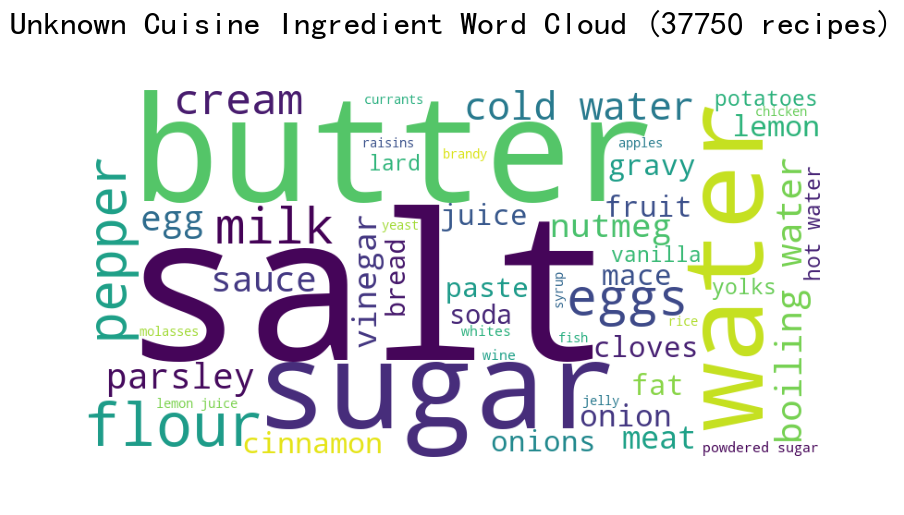


Top 50 Ingredients in Unknown Cuisine:
salt: 14858 times
butter: 14223 times
sugar: 11641 times
water: 9729 times
flour: 9716 times
pepper: 7343 times
eggs: 6938 times
milk: 6795 times
cream: 4960 times
cold water: 3941 times
boiling water: 3543 times
egg: 3152 times
sauce: 3121 times
parsley: 3054 times
nutmeg: 2773 times
vinegar: 2599 times
meat: 2397 times
onion: 2218 times
cinnamon: 2018 times
lemon: 1965 times
cloves: 1842 times
gravy: 1814 times
onions: 1782 times
fat: 1780 times
juice: 1773 times
mace: 1744 times
fruit: 1732 times
paste: 1674 times
soda: 1595 times
bread: 1573 times
potatoes: 1529 times
lard: 1494 times
yolks: 1459 times
hot water: 1408 times
vanilla: 1389 times
powdered sugar: 1319 times
wine: 1317 times
whites: 1315 times
fish: 1175 times
rice: 1154 times
apples: 1147 times
lemon juice: 1109 times
raisins: 1079 times
molasses: 1068 times
brandy: 1051 times
chicken: 1034 times
syrup: 1022 times
jelly: 1020 times
currants: 1015 times
yeast: 973 times


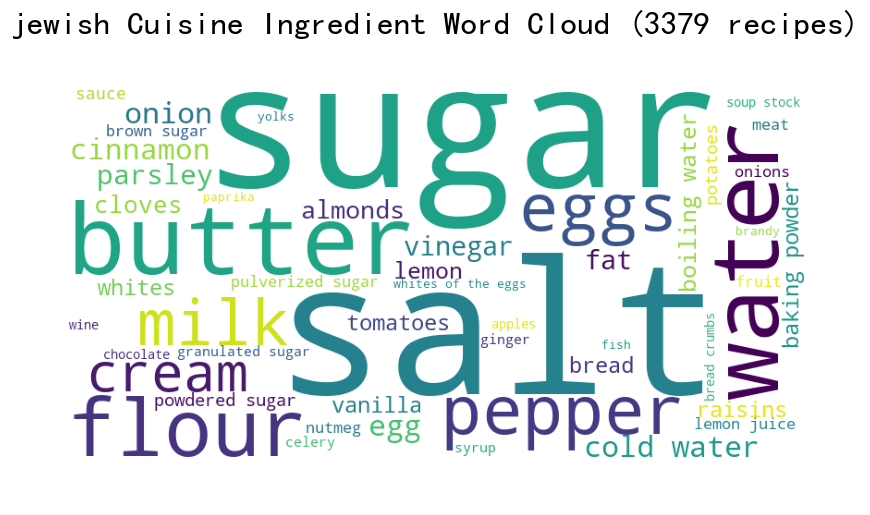


Top 50 Ingredients in jewish Cuisine:
salt: 1410 times
sugar: 1253 times
butter: 1055 times
water: 976 times
flour: 922 times
pepper: 633 times
eggs: 591 times
milk: 553 times
cream: 381 times
cold water: 355 times
onion: 352 times
egg: 346 times
cinnamon: 318 times
parsley: 298 times
vinegar: 284 times
fat: 282 times
almonds: 235 times
cloves: 226 times
boiling water: 204 times
lemon: 199 times
vanilla: 181 times
whites: 175 times
bread: 173 times
raisins: 172 times
baking powder: 168 times
tomatoes: 166 times
powdered sugar: 161 times
potatoes: 158 times
sauce: 146 times
pulverized sugar: 143 times
nutmeg: 138 times
fruit: 131 times
onions: 128 times
brown sugar: 127 times
meat: 123 times
lemon juice: 123 times
granulated sugar: 122 times
ginger: 120 times
syrup: 120 times
celery: 116 times
soup stock: 107 times
chocolate: 107 times
wine: 106 times
bread crumbs: 106 times
apples: 106 times
whites of the eggs: 98 times
yolks: 98 times
paprika: 96 times
fish: 94 times
brandy: 91 times

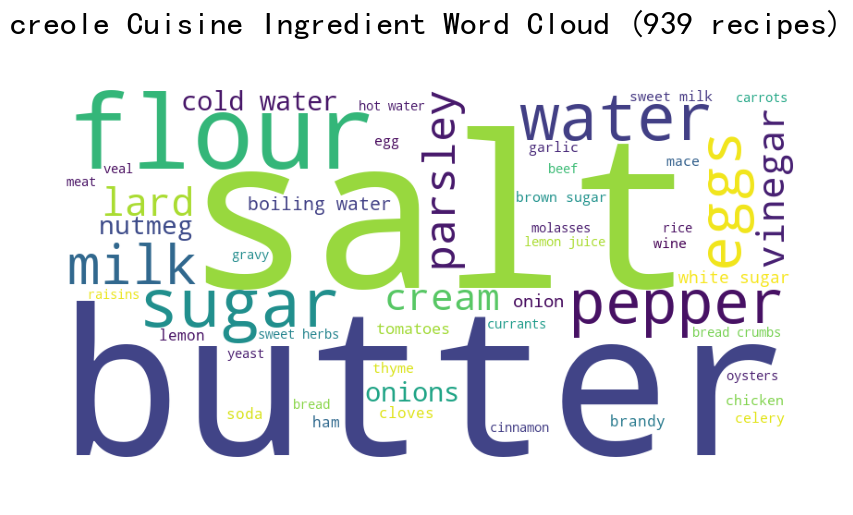


Top 50 Ingredients in creole Cuisine:
salt: 386 times
butter: 376 times
flour: 302 times
sugar: 290 times
water: 266 times
pepper: 230 times
eggs: 217 times
milk: 191 times
parsley: 114 times
lard: 89 times
vinegar: 86 times
cream: 85 times
cold water: 84 times
onions: 83 times
nutmeg: 76 times
boiling water: 71 times
onion: 67 times
white sugar: 62 times
tomatoes: 58 times
lemon: 54 times
cloves: 54 times
ham: 53 times
soda: 51 times
brandy: 49 times
chicken: 44 times
brown sugar: 44 times
wine: 44 times
sweet milk: 43 times
egg: 42 times
mace: 41 times
thyme: 40 times
celery: 39 times
garlic: 39 times
molasses: 36 times
beef: 35 times
bread crumbs: 35 times
yeast: 35 times
oysters: 34 times
raisins: 33 times
veal: 32 times
gravy: 32 times
rice: 31 times
hot water: 31 times
bread: 29 times
cinnamon: 29 times
meat: 28 times
carrots: 27 times
currants: 27 times
lemon juice: 26 times
sweet herbs: 26 times


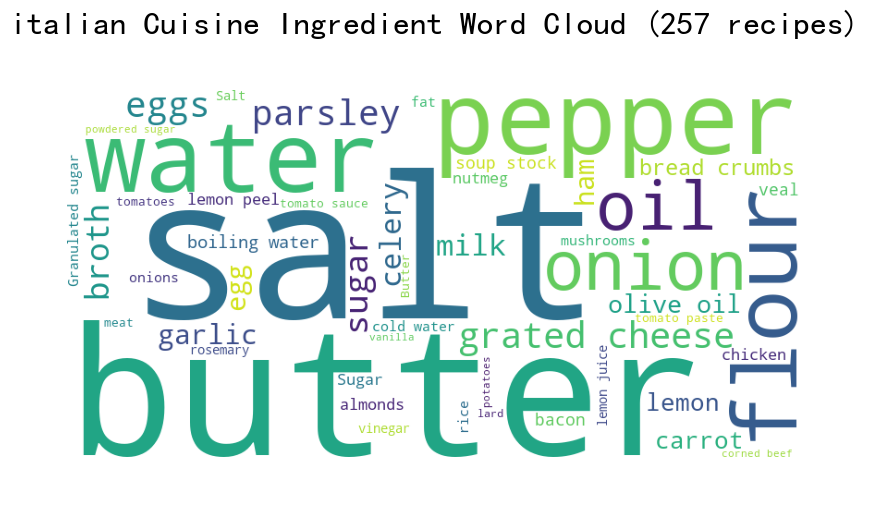


Top 50 Ingredients in italian Cuisine:
salt: 153 times
butter: 140 times
pepper: 108 times
water: 102 times
flour: 79 times
onion: 61 times
oil: 59 times
grated cheese: 57 times
parsley: 54 times
eggs: 53 times
sugar: 48 times
broth: 45 times
milk: 37 times
celery: 36 times
garlic: 32 times
ham: 30 times
egg: 30 times
olive oil: 26 times
carrot: 25 times
lemon: 25 times
bread crumbs: 23 times
boiling water: 21 times
soup stock: 19 times
veal: 18 times
bacon: 17 times
nutmeg: 16 times
chicken: 16 times
lemon peel: 16 times
almonds: 16 times
Sugar: 16 times
mushrooms: 13 times
rice: 13 times
fat: 13 times
cold water: 13 times
onions: 13 times
Granulated sugar: 13 times
Salt: 12 times
lemon juice: 12 times
rosemary: 12 times
vinegar: 12 times
meat: 11 times
tomatoes: 11 times
Butter: 11 times
tomato paste: 11 times
tomato sauce: 11 times
lard: 10 times
potatoes: 9 times
vanilla: 9 times
powdered sugar: 9 times
corned beef: 9 times


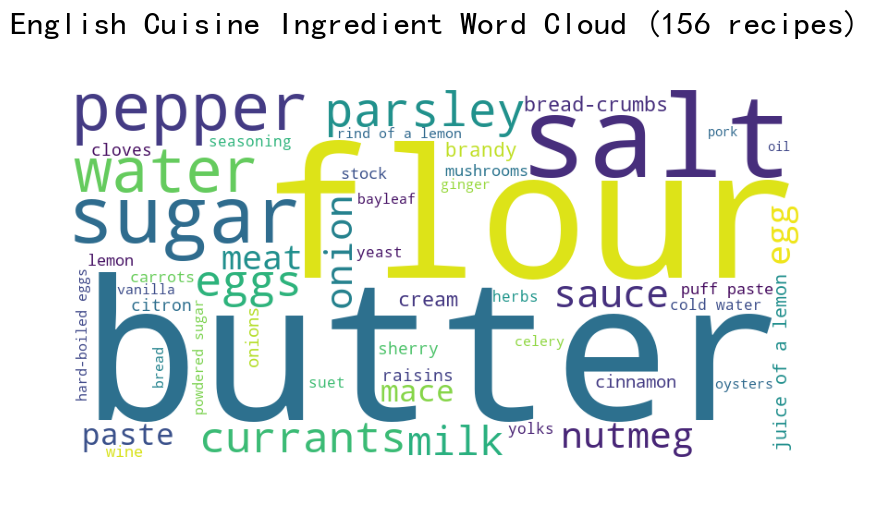


Top 50 Ingredients in English Cuisine:
butter: 79 times
flour: 67 times
salt: 66 times
sugar: 56 times
pepper: 38 times
water: 34 times
parsley: 33 times
eggs: 30 times
currants: 28 times
milk: 25 times
sauce: 23 times
onion: 22 times
nutmeg: 21 times
egg: 18 times
meat: 18 times
mace: 14 times
paste: 14 times
bread-crumbs: 14 times
cream: 14 times
brandy: 13 times
juice of a lemon: 12 times
onions: 11 times
cinnamon: 11 times
cloves: 10 times
sherry: 10 times
raisins: 10 times
citron: 10 times
wine: 9 times
lemon: 9 times
mushrooms: 9 times
puff paste: 9 times
carrots: 9 times
stock: 9 times
seasoning: 8 times
herbs: 8 times
yolks: 8 times
cold water: 8 times
suet: 8 times
yeast: 8 times
oysters: 7 times
celery: 7 times
ginger: 7 times
powdered sugar: 7 times
bread: 7 times
vanilla: 7 times
bayleaf: 7 times
hard-boiled eggs: 7 times
rind of a lemon: 7 times
pork: 6 times
oil: 6 times


In [65]:
# 可视化3：各民族词云

from PIL import Image, ImageOps

def generate_ethnic_wordclouds(df, top_n=5, max_words=50, padding_px=50):
    """Generate ethnic ingredient word clouds with visible border padding"""
    top_ethnic = df['ethnic_group'].value_counts().head(top_n).index

    for ethnic in top_ethnic:
        if not ethnic.strip():
            continue

        ethnic_recipes = df[df['ethnic_group'] == ethnic]
        all_ingredients = [
            ing
            for lst in ethnic_recipes['ingredients']
            for ing in lst
        ]

        if not all_ingredients:
            continue

        freq = Counter(all_ingredients)
        filtered_freq = dict(freq.most_common(max_words))

        wc = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="viridis",
            max_words=max_words
        ).generate_from_frequencies(filtered_freq)

        # 将词云转为PIL图像并添加边框
        wc_image = wc.to_image()
        padded_img = ImageOps.expand(wc_image, border=padding_px, fill='white')

        # 展示图像
        plt.figure(figsize=(12, 6))
        plt.imshow(padded_img)
        plt.title(f"{ethnic} Cuisine Ingredient Word Cloud ({len(ethnic_recipes)} recipes)", fontsize=24)
        plt.axis("off")
        plt.show()

        # 高频打印
        print(f"\nTop {max_words} Ingredients in {ethnic} Cuisine:")
        for item, count in filtered_freq.items():
            print(f"{item}: {count} times")


            
generate_ethnic_wordclouds(df_recipes, top_n=5)

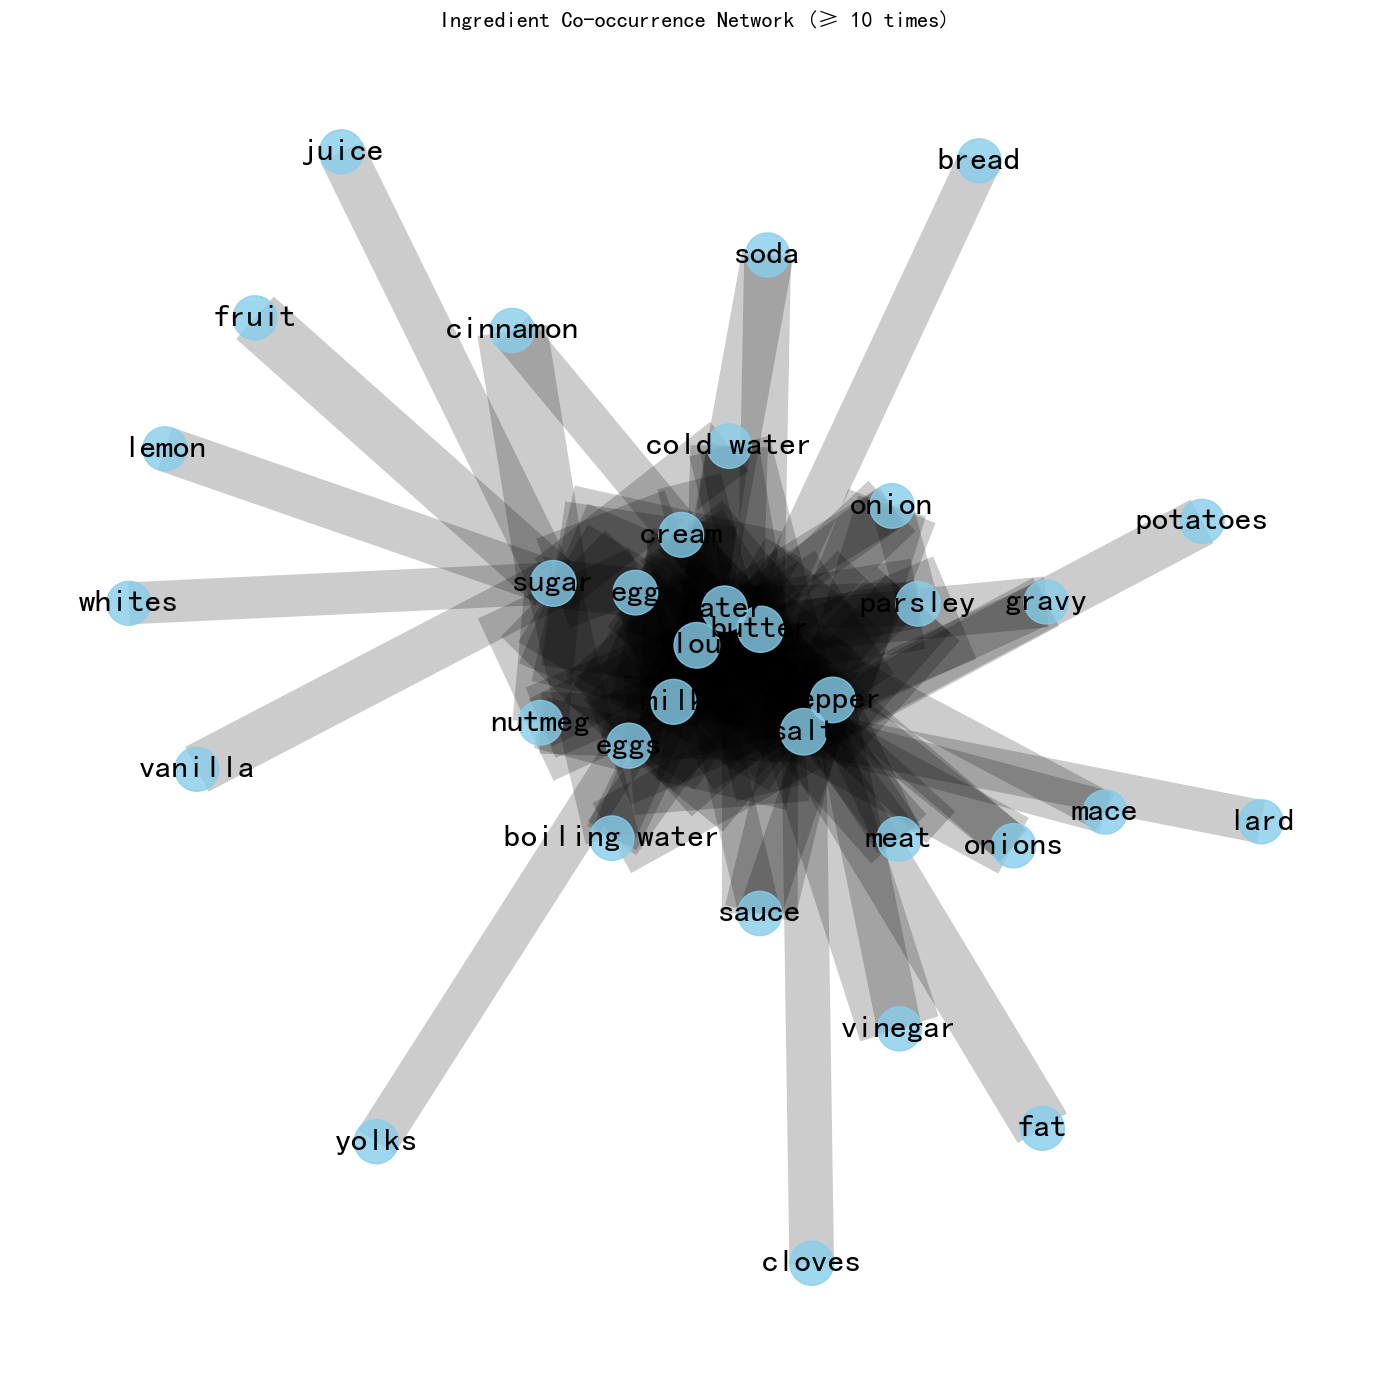


Top 10 Strongest Ingredient Pairs:
butter - salt: 8993 times
pepper - salt: 7955 times
butter - flour: 7724 times
flour - salt: 6176 times
butter - pepper: 5279 times
salt - water: 5139 times
butter - sugar: 4805 times
butter - eggs: 4549 times
butter - milk: 4217 times
flour - sugar: 4165 times


In [66]:
# 可视化4：食材网络（需要networkx库）
import networkx as nx

def plot_ingredient_network(df, min_count=10, top_n=100):
    """Plot an ingredient co-occurrence network using networkx"""
    from itertools import combinations

    # 统计共现
    co_occurrence = defaultdict(int)
    for ingredients in df['ingredients']:
        for a, b in combinations(sorted(set(ingredients)), 2):
            co_occurrence[(a, b)] += 1

    # 过滤高频边
    filtered_edges = {
        (a, b): count
        for (a, b), count in co_occurrence.items()
        if count >= min_count
    }

    if not filtered_edges:
        print(f"No ingredient pairs with frequency ≥ {min_count}")
        return

    # 构建网络
    G = nx.Graph()
    for (a, b), weight in filtered_edges.items():
        G.add_edge(a, b, weight=weight)

    # 可选：只保留最强 top_n 条边
    if top_n:
        top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_n]
        G = nx.Graph()
        for a, b, attr in top_edges:
            G.add_edge(a, b, weight=attr['weight'])

    # 生成布局
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    # 提取边权重
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    node_sizes = [1000 + 5 * G.degree(n) for n in G.nodes()]

    # 绘图
    plt.figure(figsize=(14, 14))
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=[w / min_count * 0.3 for w in edge_weights])
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=24)

    plt.title(f"Ingredient Co-occurrence Network (≥ {min_count} times)", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # 打印前10高权重边
    print("\nTop 10 Strongest Ingredient Pairs:")
    top_10 = sorted(filtered_edges.items(), key=lambda x: x[1], reverse=True)[:10]
    for (a, b), weight in top_10:
        print(f"{a} - {b}: {weight} times")


try:
    import networkx as nx
    plot_ingredient_network(df_recipes)
except ImportError:
    print("\n提示：安装networkx可获得更好的网络可视化效果")
    print("运行: pip install networkx")